<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Proyecto 2: Análisis de señales ECG</font></b></h1>
        <h2><font color='0B5345'>Proyecto 2024-02</font></h2>
        <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Stalyn Chingal Atis</font></h3>
    </div>
</div>

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal 
from scipy.fftpack import fft
from scipy.signal import detrend
from scipy.fftpack import fft
from numpy.polynomial.polynomial import Polynomial

<hr>
<h3><strong>Cargar datos</strong></h3>

In [86]:
ruta=r"C:\Users\luisa\OneDrive - Universidad de Antioquia\Documentos\BIOSENALES24II\Proyecto2\Diagnostics.xlsx"
df = pd.read_excel(ruta)

# Crear el nuevo dataframe filtrando por la columna 'Rhythm'
datos = df[(df['Rhythm'] == 'SB') | (df['Rhythm'] == 'AFIB')]

datos.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
5,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
6,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395


In [87]:
# Tamaño del nuevo dataframe
print(datos.shape)
# Vector de tiempo 
fs=500
tiempo = np.arange(0, datos.shape[0]/fs,1/fs)
print(tiempo.shape)

(5669, 16)
(5669,)



<hr>
<h3><strong>Ecuación 1</strong></h3>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

def detrending(data, grado=20):
    """
    Realiza el detrending de las señales en las columnas 7 a 16 de un dataframe usando un ajuste polinómico de grado 20.
    Retorna el dataframe con las señales detrendizadas y la desviación calculada.
    """
    #detrended_data = data.copy()  # Copiar el dataframe original para no modificarlo directamente
    #deviations = {}

    for col in data.columns[5:]:  # Columnas de interés para el detrend (a partir de la columna 7)
        x = data[col].values
        # Ajustar el polinomio de grado 20
        p = Polynomial.fit(np.arange(len(x)), x, grado)
        # Restar la tendencia polinómica
        detrended_signal = x - p(np.arange(len(x)))
        # Calcular la desviación (δ(n))
        deviation = np.mean((x - detrended_signal)**2)
        #deviations[col] = detrended_signal
        # Reemplazar la columna con la señal detrendizada
        data[col] = detrended_signal
        print(f'Desviación para la columna {col}: {deviation}')
    
    return data, deviation


Desviación para la columna VentricularRate: 4589.096185869872
Desviación para la columna AtrialRate: 6570.894220498808
Desviación para la columna QRSDuration: 8678.31088547902
Desviación para la columna QTInterval: 169891.67942939972
Desviación para la columna QTCorrected: 180179.1979532151
Desviación para la columna RAxis: 1315.972955901599
Desviación para la columna TAxis: 1893.7354095576823
Desviación para la columna QRSCount: 123.95841680878695
Desviación para la columna QOnset: 48008.14590895649
Desviación para la columna QOffset: 70587.01475879733
Desviación para la columna TOffset: 180790.10542686185


C:\Users\luisa\AppData\Local\Temp\ipykernel_15512\1670303904.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = detrended_signal


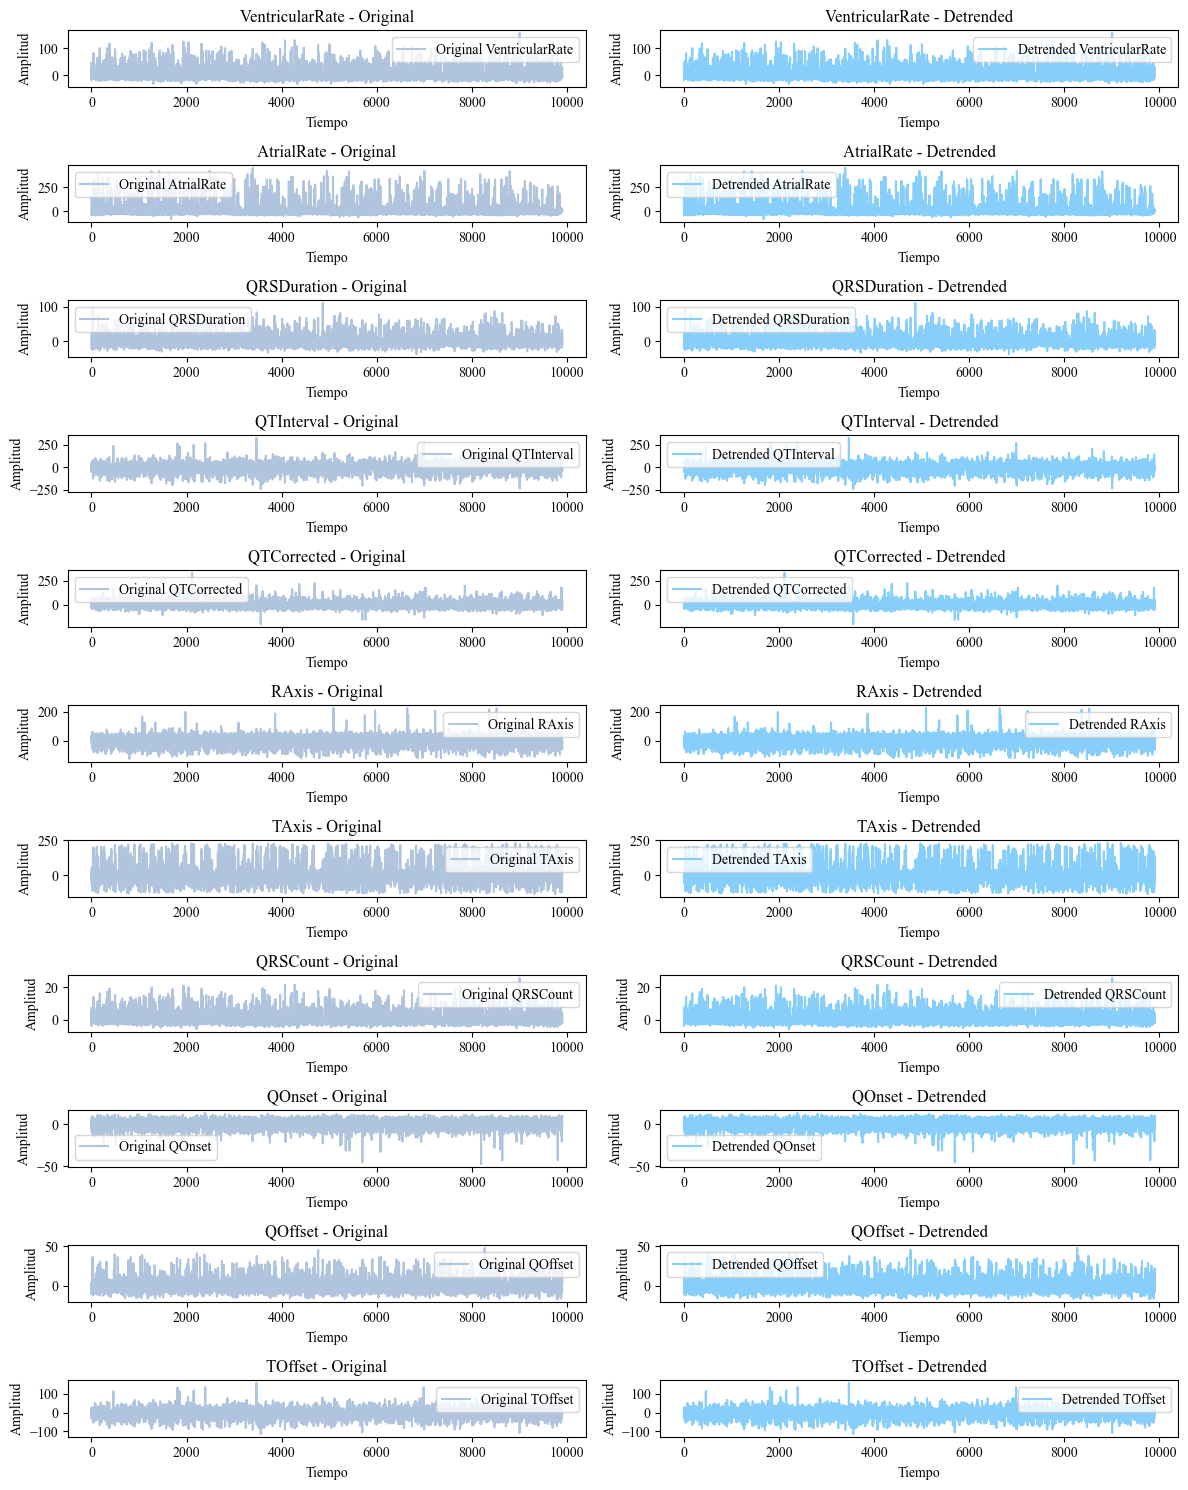

In [89]:
# Aplicar detrending y obtener la desviación
detrended_signal, deviations = detrending(datos)

# Graficar las señales originales y detrendizadas
fig, axs = plt.subplots(len(datos.columns[5:]), 2, figsize=(12, 15))  # Graficar 2 columnas por cada señal

for i, col in enumerate(datos.columns[5:]):  # Comenzar desde la columna de interés
    # Graficar la señal original
    axs[i, 0].plot(datos[col], label=f'Original {col}',color='#B0C4DE')
    axs[i, 0].set_title(f'{col} - Original')
    axs[i, 0].set_xlabel('Tiempo')  # Etiqueta para el eje X
    axs[i, 0].set_ylabel('Amplitud')  # Etiqueta para el eje Y
    axs[i, 0].legend()
    
    # Graficar la señal detrendizada
    axs[i, 1].plot(detrended_signal[col], label=f'Detrended {col}', color='#87CEFA')
    axs[i, 1].set_title(f'{col} - Detrended')
    axs[i, 1].set_xlabel('Tiempo')  # Etiqueta para el eje X
    axs[i, 1].set_ylabel('Amplitud')  # Etiqueta para el eje Y
    axs[i, 1].legend()

# Ajustar el layout para que las gráficas no se solapen
plt.tight_layout()
plt.show()


<hr>
<h3><strong>Ecuación 2</strong></h3>

In [90]:
def compression(data):
    """
    Aplica la compresión a las señales en las columnas 6 a 16, escalando los valores en el rango (0, 1).
    """
    for col in data.columns[5:]:
        x = data[col].values
        # Encontrar los valores máximos y mínimos de la señal
        xmin, xmax = np.min(x), np.max(x)
        # Comprimir la señal
        compressed_signal = (x - xmin) / (xmax - xmin)
        # Reemplazar la columna con la señal comprimida
        data[col] = compressed_signal
    
    return data

C:\Users\luisa\AppData\Local\Temp\ipykernel_15512\305150442.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = compressed_signal


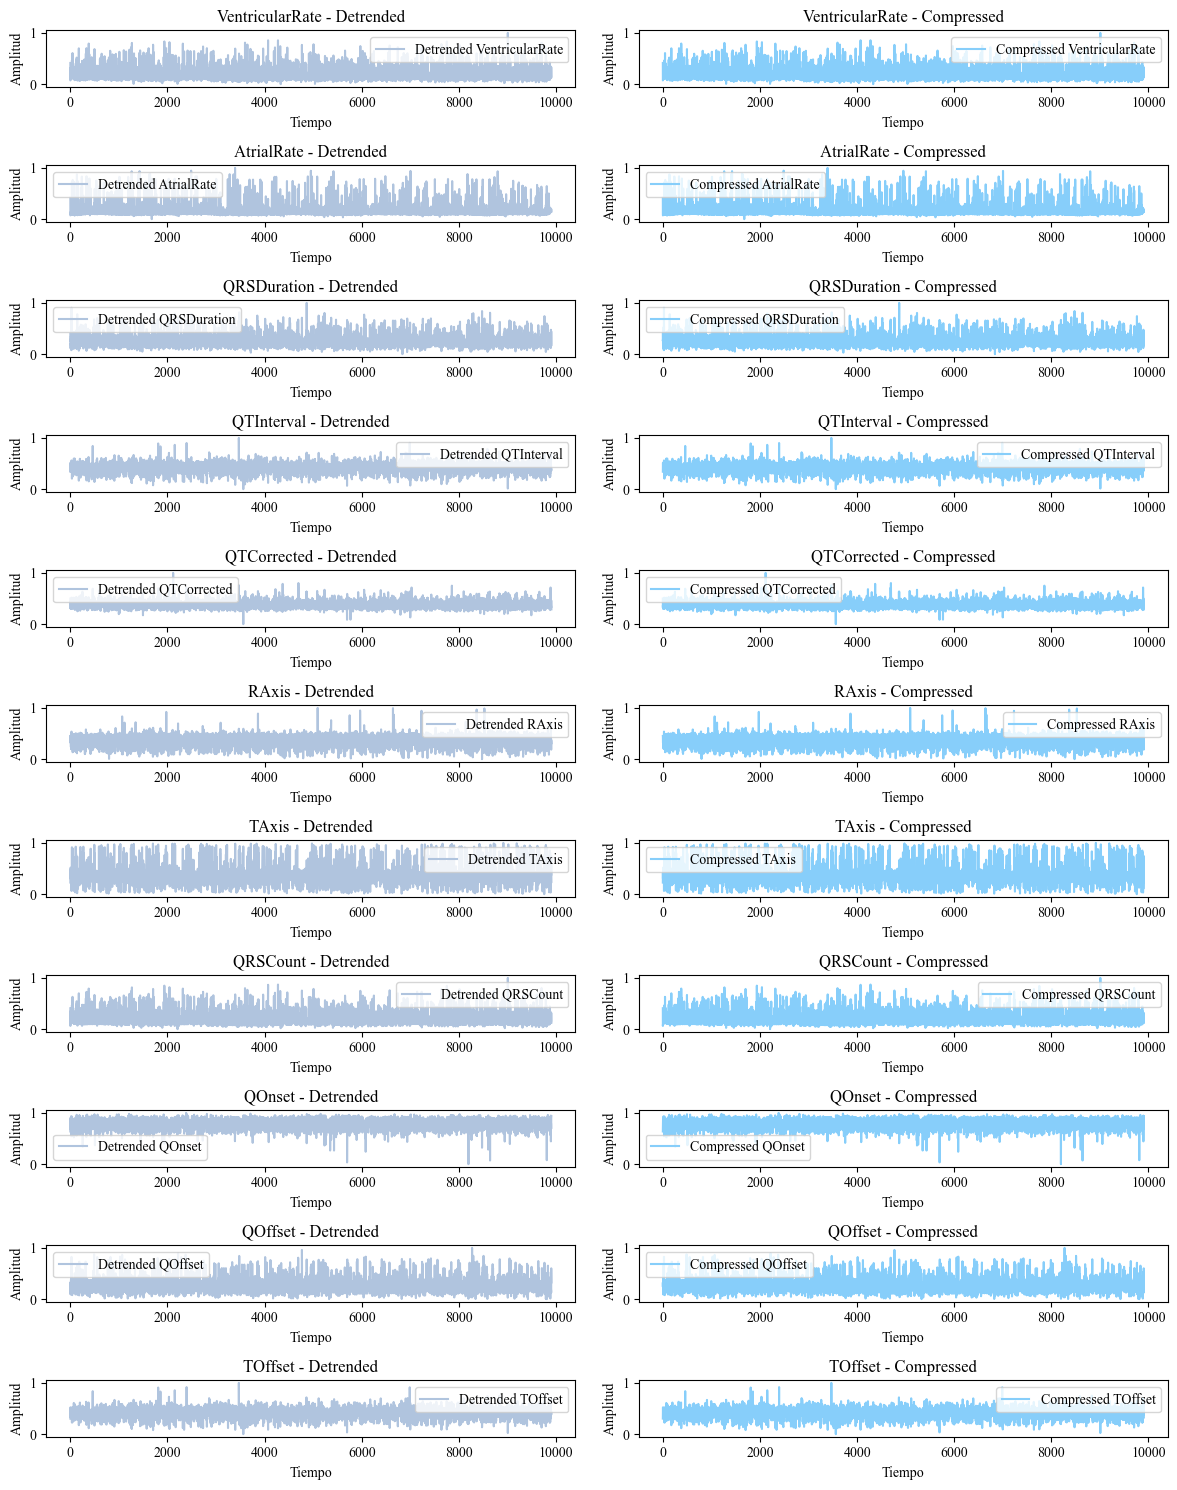

In [91]:
compression_signal = compression(detrended_signal)

# Graficar las señales originales y detrendizadas
fig, axs = plt.subplots(len(datos.columns[5:]), 2, figsize=(12, 15))  # Graficar 2 columnas por cada señal

for i, col in enumerate(datos.columns[5:]):  # Comenzar desde la columna de interés
    # Graficar la señal original
    axs[i, 0].plot(detrended_signal[col], label=f'Detrended {col}',color='#B0C4DE')
    axs[i, 0].set_title(f'{col} - Detrended')
    axs[i, 0].set_xlabel('Tiempo')  # Etiqueta para el eje X
    axs[i, 0].set_ylabel('Amplitud')  # Etiqueta para el eje Y
    axs[i, 0].legend()
    
    # Graficar la señal detrendizada
    axs[i, 1].plot(compression_signal[col], label=f'Compressed {col}', color='#87CEFA')
    axs[i, 1].set_title(f'{col} - Compressed')
    axs[i, 1].set_xlabel('Tiempo')  # Etiqueta para el eje X
    axs[i, 1].set_ylabel('Amplitud')  # Etiqueta para el eje Y
    axs[i, 1].legend()

# Ajustar el layout para que las gráficas no se solapen
plt.tight_layout()
plt.show()

<hr>
<h3><strong>Ecuación 3</strong></h3>

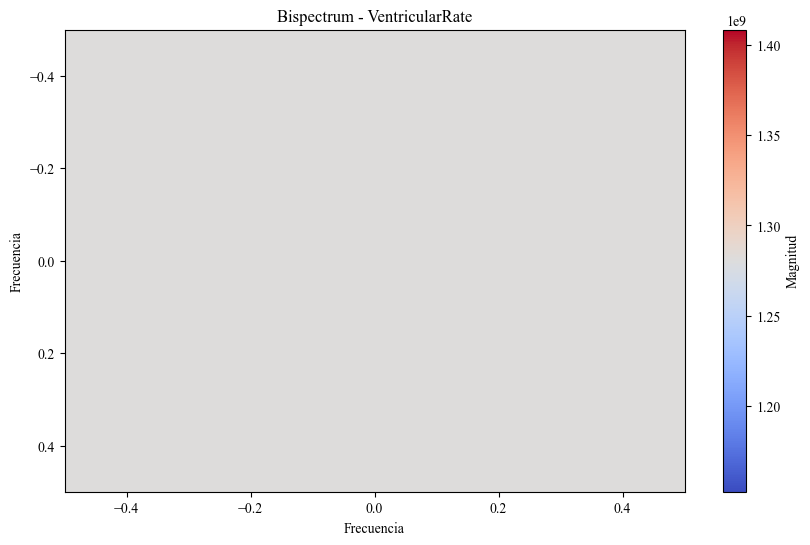

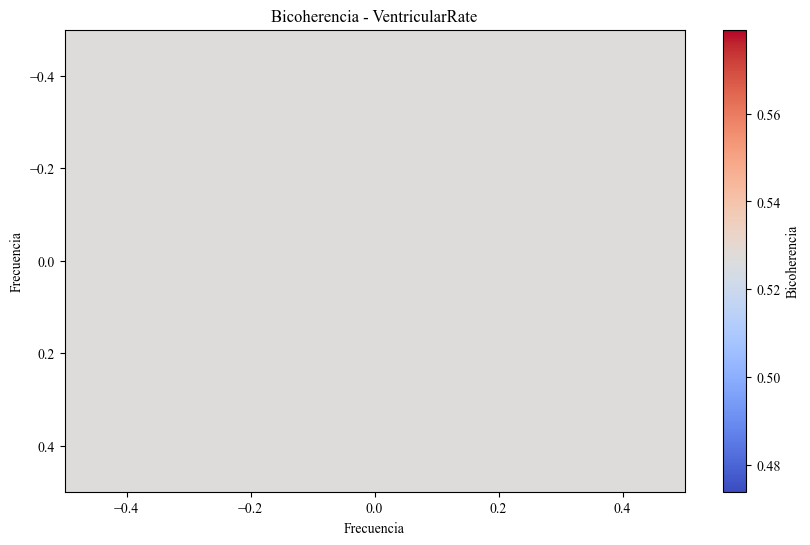

Bicoherencia para la columna VentricularRate: 0.5264994102495026


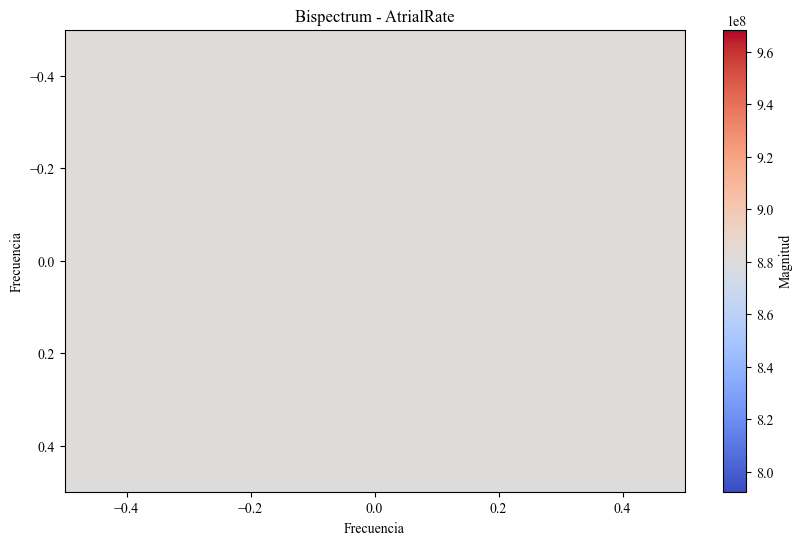

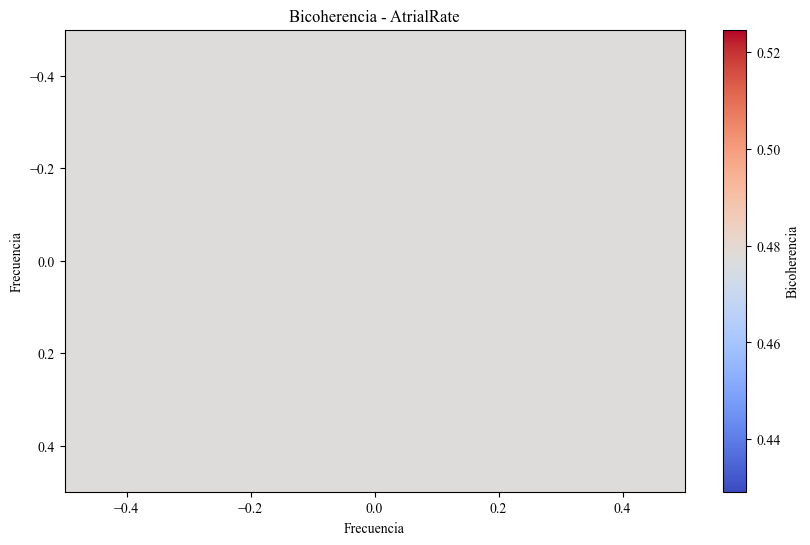

Bicoherencia para la columna AtrialRate: 0.47686291589766483


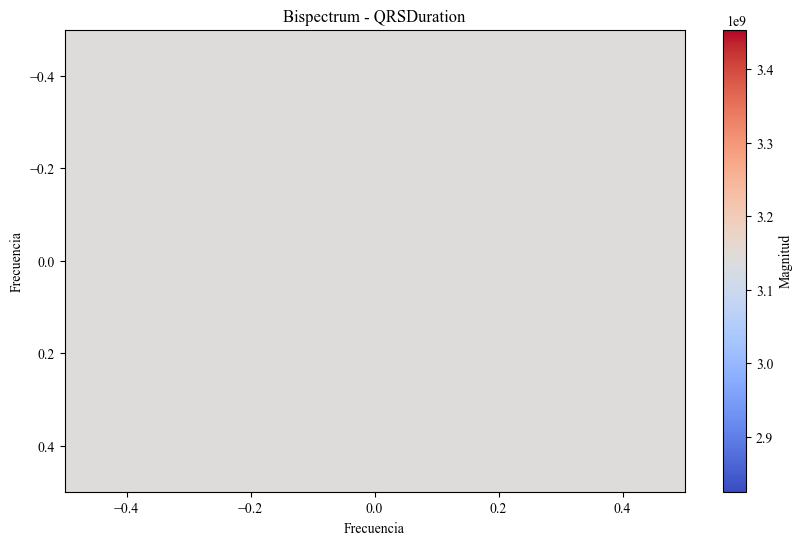

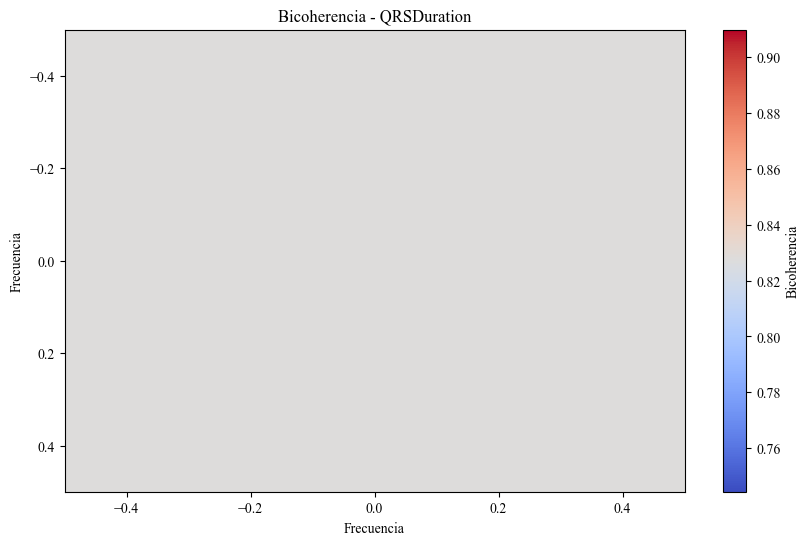

Bicoherencia para la columna QRSDuration: 0.8271047053791393


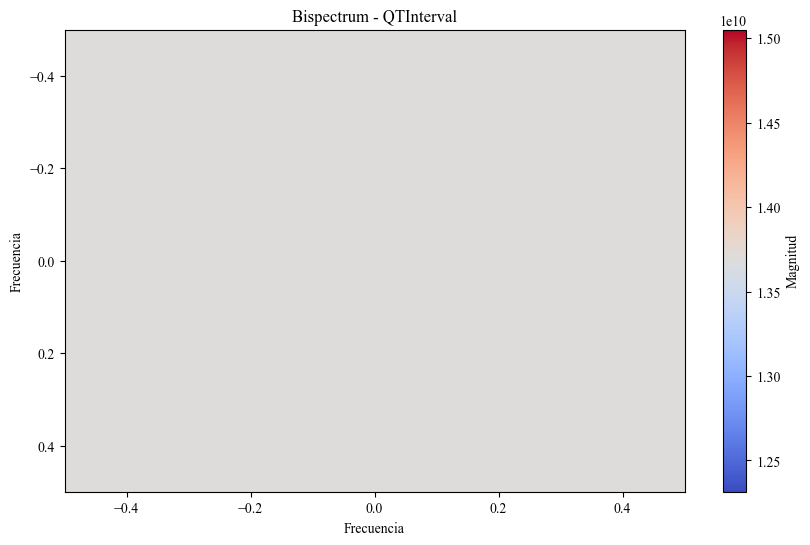

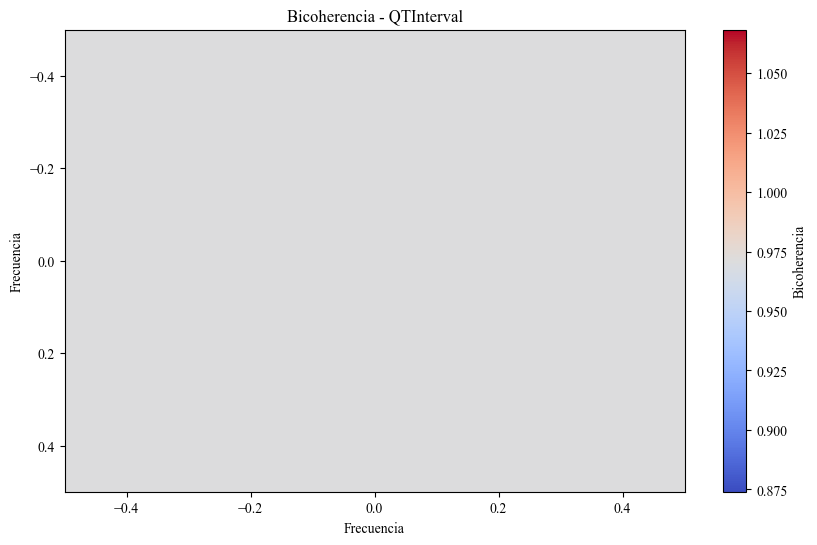

Bicoherencia para la columna QTInterval: 0.9711410987742352


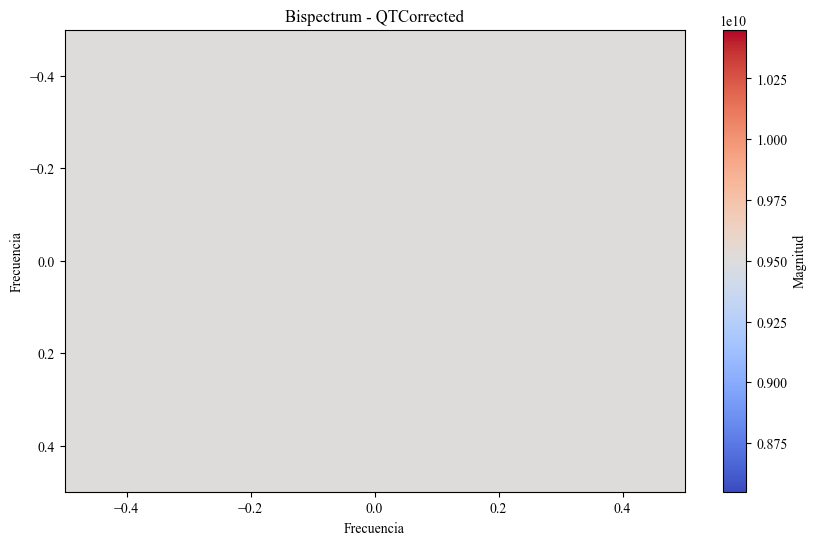

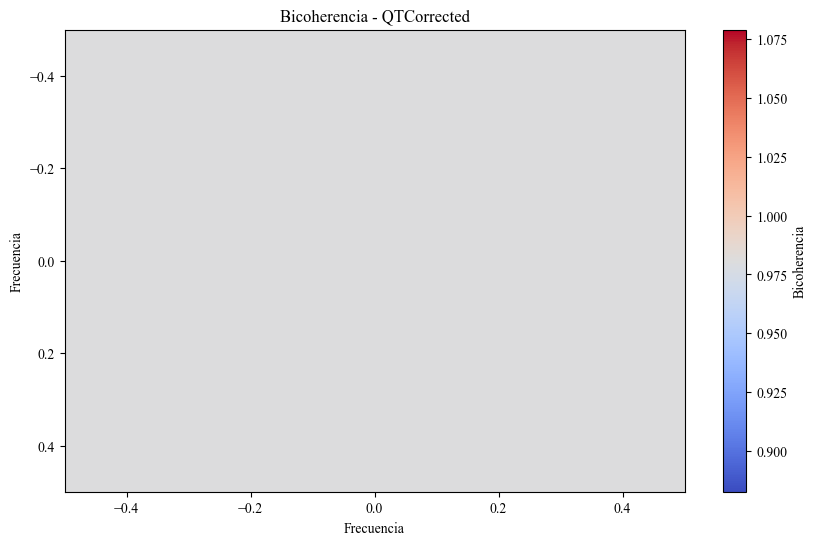

Bicoherencia para la columna QTCorrected: 0.9808028586299279


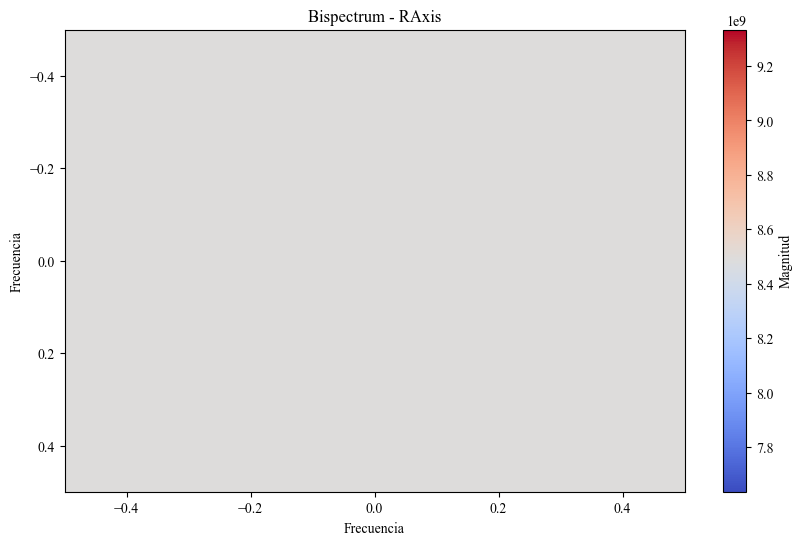

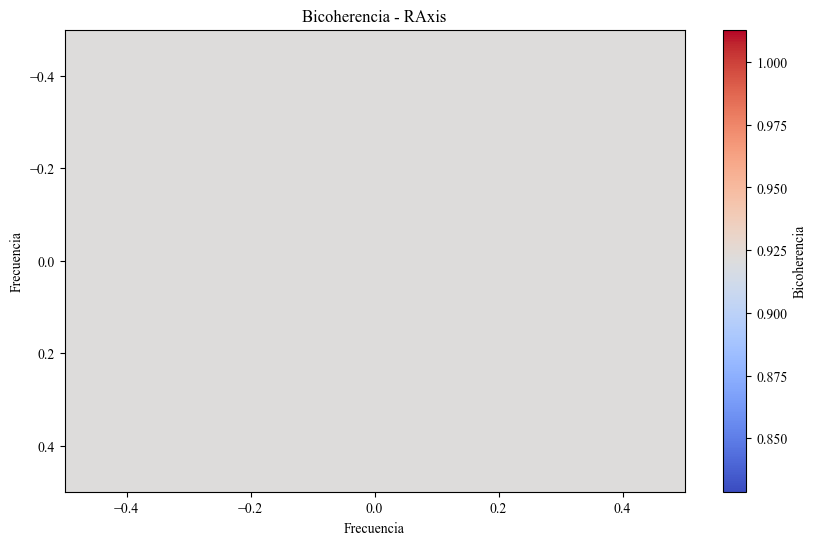

Bicoherencia para la columna RAxis: 0.9207916264198474


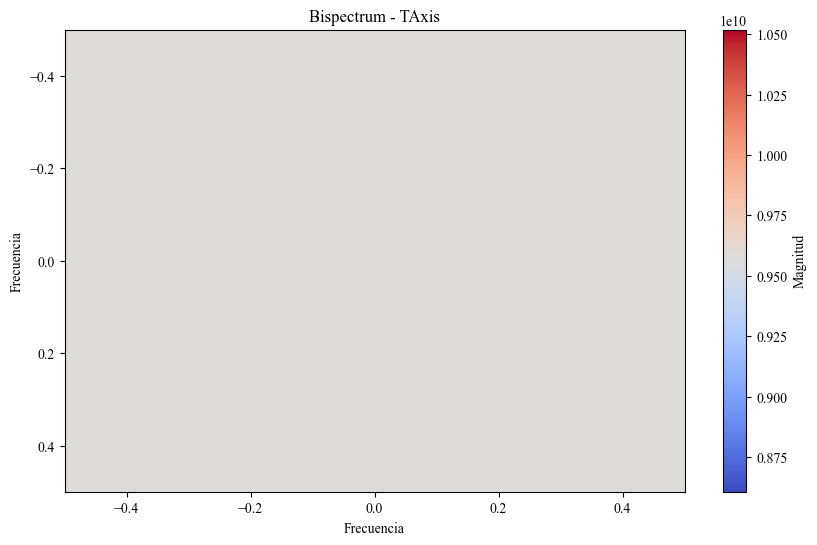

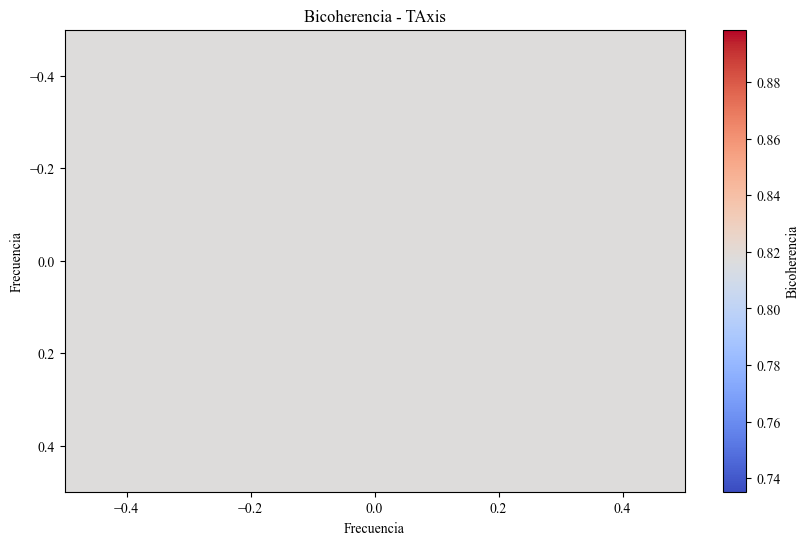

Bicoherencia para la columna TAxis: 0.816890080534946


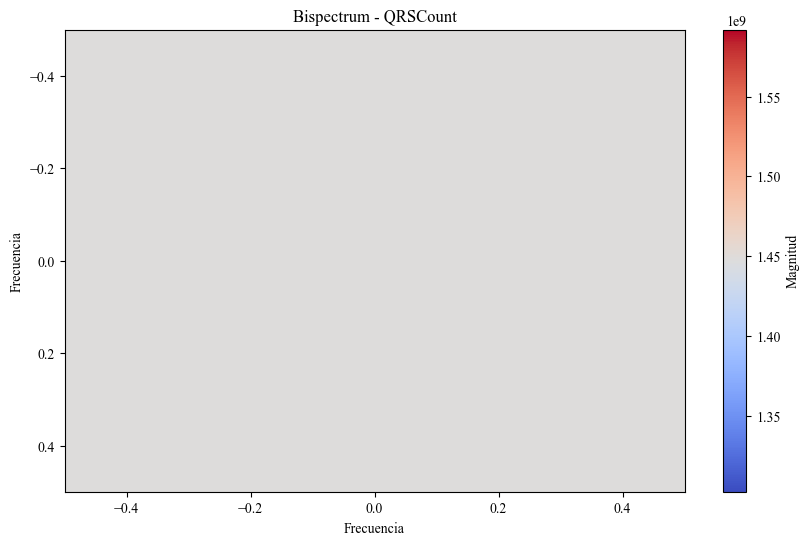

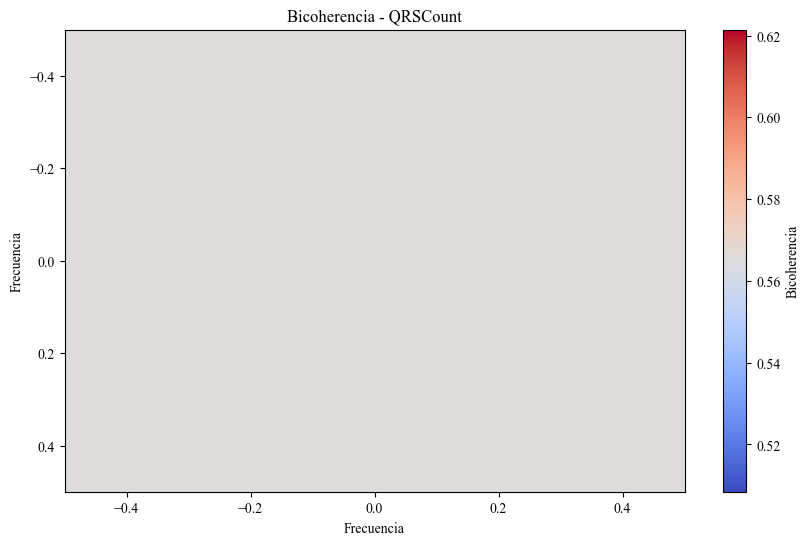

Bicoherencia para la columna QRSCount: 0.5649293378031766


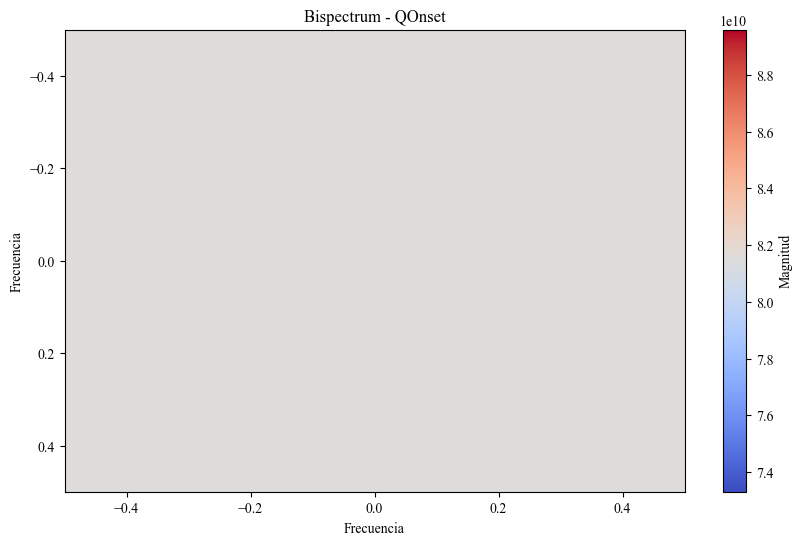

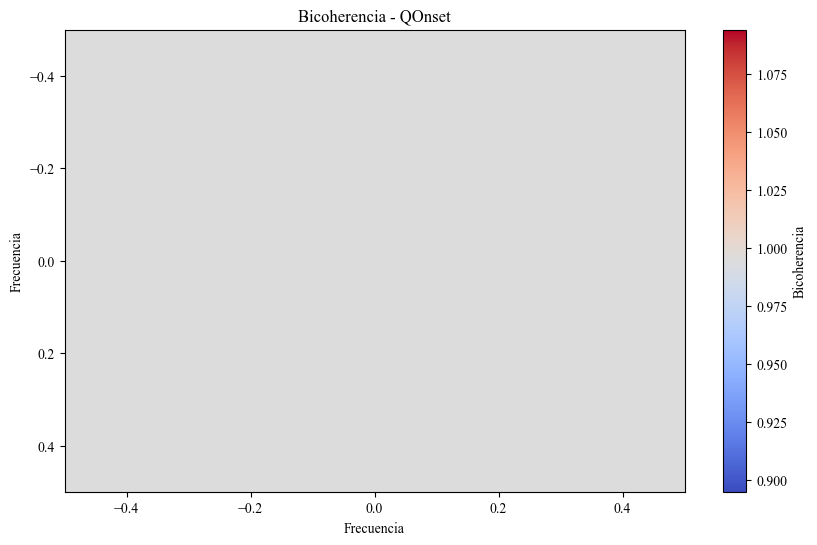

Bicoherencia para la columna QOnset: 0.9945066716391582


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

def bispectrum_bicoherence(data, segment_length=5569, overlap=0.5):
    """
    Calcula el bispectrum y la bicoherencia de las señales en las columnas 5 a 16 con ventana de superposición.
    overlap: porcentaje de superposición entre los segmentos (e.g., 0.5 para 50%).
    """
    step = int(segment_length * (1 - overlap))  # Tamaño del paso entre segmentos

    for col in data.columns[5:]:
        x = data[col].values
        # Crear los segmentos con solapamiento
        segments = [x[i:i + segment_length] for i in range(0, len(x) - segment_length + 1, step)]
        bispectrum_sum = 0
        bicoherence_sum = 0
        N = len(segments)
        
        # Calcular la FFT para cada segmento y luego calcular bispectrum y bicoherence
        for segment in segments:
            X = fft(segment)
            f1_f2_pairs = [(f1, f2) for f1 in range(len(X)//2) for f2 in range(f1, len(X)//2) if f1 + f2 < len(X)//2]
            for f1, f2 in f1_f2_pairs:
                bispectrum_sum += X[f1] * X[f2] * np.conj(X[f1 + f2])
                bicoherence_sum += np.abs(X[f1] * X[f2] * np.conj(X[f1 + f2]))
        
        bispectrum = bispectrum_sum / N
        bicoherence = np.abs(bispectrum_sum) / bicoherence_sum if bicoherence_sum != 0 else 0

        # Graficar el bispectrum
        plt.figure(figsize=(10, 6))
        plt.imshow(np.abs(bispectrum).reshape(-1, 1), aspect='auto', cmap='coolwarm')
        plt.title(f'Bispectrum - {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel('Frecuencia')
        plt.colorbar(label='Magnitud')
        plt.grid(False)
        plt.show()

        # Graficar la bicoherencia
        plt.figure(figsize=(10, 6))
        plt.imshow(bicoherence.reshape(-1, 1), aspect='auto', cmap='coolwarm')
        plt.title(f'Bicoherencia - {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel('Frecuencia')
        plt.colorbar(label='Bicoherencia')
        plt.grid(False)
        plt.show()

        print(f'Bicoherencia para la columna {col}: {bicoherence}')

    return data

bispectrum_bicoherence(compression_signal)